<a href="https://colab.research.google.com/github/diegsegr/MAD2021_Visualizacion/blob/main/Modelos_Bank_Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *Business Intelligence.*

---


>>*Maestría en Analítica de Datos*

>>**Proyecto 2021-2** Empresa Solent Services

>>*Facultad de Ingeniería y Ciencias Básicas.*

>>*Universidad Central  2021 - 2*

> >Profesor: Sandra Catalina Moreno

>>
> >Estudiante: Diego Segura Rojas

>*Actividad:*

>Realizar un análisis de clientes potenciales sobre datos de bancos.


>---

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive
from datetime import datetime
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy import cluster
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import kruskal
!pip install prince
import prince
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy import cluster
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import kruskal
import prince

In [2]:
#Cargue de bases de datos:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
df_test1=pd.read_csv('/content/drive/MyDrive/U_CENTRAL/BUSINESS INTELLIGENCE/TRABAJOS/Taller 4/Bank Loan/test.csv')#,header=1)#,names=col_names)
df_train1=pd.read_csv('/content/drive/MyDrive/U_CENTRAL/BUSINESS INTELLIGENCE/TRABAJOS/Taller 4/Bank Loan/train.csv')#,header=1)#,names=col_names)
df_test=df_test1.copy()
df_train=df_train1.copy()

In [4]:
df_train[['Loan_Amount','Loan_Period','Interest_Rate','EMI']].describe()

Loan_Amount   Loan_Period  Interest_Rate           EMI
count   42004.000000  42004.000000   22276.000000  22276.000000
mean    39429.982859      3.890629      19.213570   1101.466242
std     30727.595990      1.167491       5.847136    752.661394
min      5000.000000      1.000000      11.990000    118.000000
25%     20000.000000      3.000000      15.250000    649.000000
50%     30000.000000      4.000000      18.000000    941.000000
75%     50000.000000      5.000000      20.000000   1295.000000
max    300000.000000      6.000000      37.000000  13556.000000

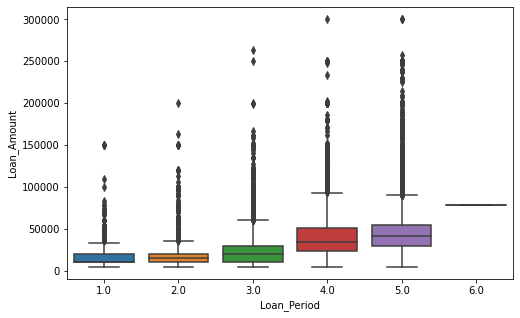

In [ ]:
plt.figure(figsize=(8, 5))
#order = ['Menor a 1 año', 'Entre 0 y 5 años', 'Entre 6 y 10 años', 'Entre 11 y 15 años','Entre 16 y 20 años','Entre 21 y 25 años']
chart = sns.boxplot(
    x="Loan_Period", y="Loan_Amount", data=df_train[['Loan_Amount',"Loan_Period"]]#.groupby("Loan_Period").mean().reset_index(),
    )#hue="et_time")#, hue_order=order)
#plt.xticks(rotation=90)

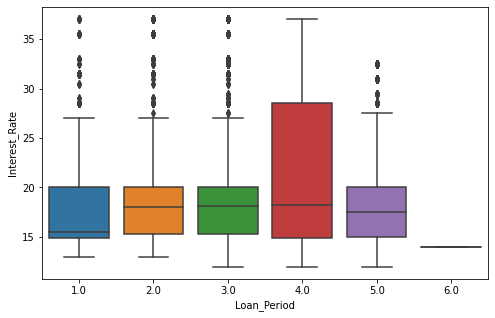

In [ ]:
plt.figure(figsize=(8, 5))
#order = ['Menor a 1 año', 'Entre 0 y 5 años', 'Entre 6 y 10 años', 'Entre 11 y 15 años','Entre 16 y 20 años','Entre 21 y 25 años']
chart = sns.boxplot(
    x="Loan_Period", y="Interest_Rate", data=df_train[['Interest_Rate',"Loan_Period"]]#.groupby("Loan_Period").mean().reset_index(),
    )#hue="et_time")#, hue_order=order)
#plt.xticks(rotation=90)

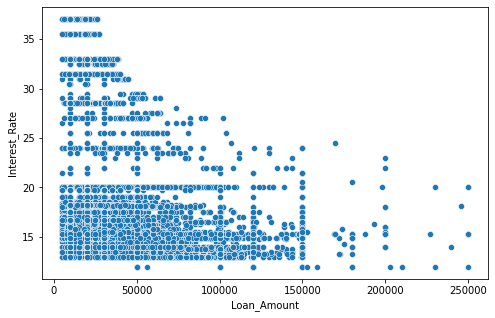

In [ ]:
plt.figure(figsize=(8, 5))
#order = ['Menor a 1 año', 'Entre 0 y 5 años', 'Entre 6 y 10 años', 'Entre 11 y 15 años','Entre 16 y 20 años','Entre 21 y 25 años']
chart = sns.scatterplot(
    x='Loan_Amount', y="Interest_Rate", data=df_train[['Interest_Rate','Loan_Amount']]#.groupby("Loan_Period").mean().reset_index(),
    )#hue="et_time")#, hue_order=order)
#plt.xticks(rotation=90)

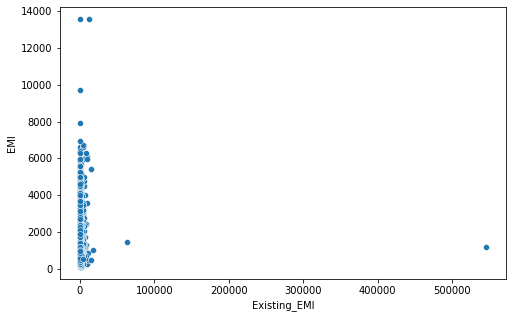

In [ ]:
plt.figure(figsize=(8, 5))
#order = ['Menor a 1 año', 'Entre 0 y 5 años', 'Entre 6 y 10 años', 'Entre 11 y 15 años','Entre 16 y 20 años','Entre 21 y 25 años']
chart = sns.scatterplot(
    x='Existing_EMI', y="EMI", data=df_train[['Existing_EMI','EMI']]#.groupby("Loan_Period").mean().reset_index(),
    )#hue="et_time")#, hue_order=order)
#plt.xticks(rotation=90)

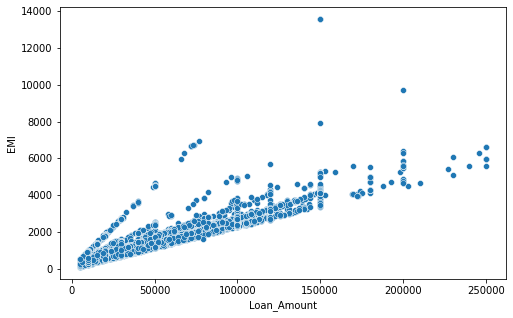

In [ ]:
plt.figure(figsize=(8, 5))
#order = ['Menor a 1 año', 'Entre 0 y 5 años', 'Entre 6 y 10 años', 'Entre 11 y 15 años','Entre 16 y 20 años','Entre 21 y 25 años']
chart = sns.scatterplot(
    x='Loan_Amount', y="EMI", data=df_train[['Loan_Amount','EMI']]#.groupby("Loan_Period").mean().reset_index(),
    )#hue="et_time")#, hue_order=order)
#plt.xticks(rotation=90)

In [9]:
import statistics as stats
int_mean = stats.mean(df_train['Interest_Rate'][df_train['Interest_Rate']<=20])
print(int_mean) 

lst_nan=[]
for i in range(len(df_train['Interest_Rate'])):
  if np.isnan(df_train['Interest_Rate'][i])==True:
    if df_train['Loan_Amount'][i]<=150000:
      df_train['Interest_Rate'][i]=int_mean




16.734604538444593


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:
for i in range(len(df_train['EMI'])):
  if np.isnan(df_train['EMI'][i])==True:
    if np.isnan(df_train['Loan_Amount'][i])==False:
      x=df_train['Loan_Amount'][i]
      if len(df_train['EMI'][(df_train['Loan_Amount']==x) & (np.isnan(df_train['EMI'])==False)])>=1:
        y=stats.mean(df_train['EMI'][(df_train['Loan_Amount']==x) & (np.isnan(df_train['EMI'])==False)])
        df_train['EMI'][i]=y


Se han truncado las últimas 5000 líneas del flujo de salida.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pa

In [51]:
df_test['Var1']=df_test['Var1'].apply(lambda x: str(x))
df_test['Employer_Category2']=df_test['Employer_Category2'].apply(lambda x: str(x))
df_train['Var1']=df_train['Var1'].apply(lambda x: str(x))
df_train['Employer_Category2']=df_train['Employer_Category2'].apply(lambda x: str(x))
df_train['Approved']=df_train['Approved'].apply(lambda x: str(x))

In [15]:
dft_c=df_train[['Gender', 'City_Category','Employer_Category1',
       'Employer_Category2', 'Monthly_Income',
       'Customer_Existing_Primary_Bank_Code', 'Primary_Bank_Type', 'Contacted',
       'Source', 'Source_Category', 'Existing_EMI', 'Loan_Amount',
       'Loan_Period', 'Interest_Rate', 'EMI', 'Var1', 'Approved']]

In [16]:
#Eliminando duplicados
dft_c.drop_duplicates(keep='first',inplace=True)
#Eliminando nulos
dft_c.dropna(axis=0, inplace=True)
dft_c.reset_index(drop=True, inplace=True)
#Limitando datos
dft_c=dft_c[(dft_c['Loan_Amount']<=150000) & (dft_c['Interest_Rate']<=20)]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dft_c.isnull().sum()

Gender                                 0
City_Category                          0
Employer_Category1                     0
Employer_Category2                     0
Monthly_Income                         0
Customer_Existing_Primary_Bank_Code    0
Primary_Bank_Type                      0
Contacted                              0
Source                                 0
Source_Category                        0
Existing_EMI                           0
Loan_Amount                            0
Loan_Period                            0
Interest_Rate                          0
EMI                                    0
Var1                                   0
Approved                               0
dtype: int64

###Modelo

In [20]:
dft_c.columns

Index(['Gender', 'City_Category', 'Employer_Category1', 'Employer_Category2',
       'Monthly_Income', 'Customer_Existing_Primary_Bank_Code',
       'Primary_Bank_Type', 'Contacted', 'Source', 'Source_Category',
       'Existing_EMI', 'Loan_Amount', 'Loan_Period', 'Interest_Rate', 'EMI',
       'Var1', 'Approved'],
      dtype='object')

In [22]:
#'Oficina',
data_set=dft_c
data_set.reset_index(drop=True)
feature_cols = ['Gender', 'City_Category','Employer_Category1',
       'Employer_Category2', 'Monthly_Income',
       'Customer_Existing_Primary_Bank_Code', 'Primary_Bank_Type', 'Contacted',
       'Source', 'Source_Category', 'Existing_EMI', 'Loan_Amount',
       'Loan_Period', 'Interest_Rate', 'EMI', 'Var1']
X = pd.get_dummies(data_set[feature_cols])#.fillna(0) # Caracteristicas
y = data_set['Approved']# Variable objetivo

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 
# 70% training and 30% test
arbol = DecisionTreeClassifier()
arbol = arbol.fit(X_train,y_train)
y_pred = arbol.predict(X_test)

In [25]:
arbol.score(X_test,y_test)

0.9482487209759937

In [26]:
arbol.get_depth()

35

In [27]:
export_graphviz(arbol,out_file= 'arbol.dot', class_names=['0','1'],
                feature_names=X.columns,impurity=False,filled=True)
with open ('arbol.dot') as f:
	dot_graph=f.read()
graphviz.Source (dot_graph)

In [29]:
X

Monthly_Income  Existing_EMI  Loan_Amount  ...  Var1_2  Var1_4  Var1_7
0              3500.0           0.0      20000.0  ...       0       0       0
1              2250.0           0.0      45000.0  ...       0       0       0
2              3500.0           0.0      92000.0  ...       0       0       1
3             10000.0        2500.0      50000.0  ...       0       0       0
4              7500.0           0.0     130000.0  ...       0       0       0
...               ...           ...          ...  ...     ...     ...     ...
37257          3500.0           0.0      87000.0  ...       0       0       1
37258         13300.0        3400.0      20000.0  ...       0       0       0
37259          4600.0           0.0      30000.0  ...       0       0       0
37260          2400.0           0.0      30000.0  ...       1       0       0
37262          9893.0        1366.0      80000.0  ...       0       0       0

[33880 rows x 108 columns]

In [28]:
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(DecisionTreeClassifier())
clf.fit(X, y)

feature_importances = np.mean([
    tree.feature_importances_ for tree in clf.estimators_
], axis=0)
print (feature_importances)

[1.89821453e-01 1.03623743e-01 8.11804579e-02 4.89964659e-02
 5.37986818e-02 1.26277270e-01 8.89946551e-03 1.05162185e-02
 1.46934647e-02 1.03757062e-02 5.16308414e-03 1.52196094e-02
 1.62948526e-02 1.59778158e-02 9.04270137e-03 7.61654645e-03
 6.87525212e-03 8.84898152e-03 2.49796344e-03 2.16818623e-02
 1.71255172e-02 9.99057026e-03 1.63543130e-02 8.76129693e-03
 6.15149594e-03 3.16484804e-03 1.89099907e-03 1.24520048e-03
 2.16666645e-03 3.20003392e-03 4.69491023e-04 9.55926913e-04
 3.63583652e-03 1.15876832e-03 2.23850384e-03 2.61506877e-03
 2.76848830e-03 2.19852839e-03 1.68513450e-03 3.09767513e-04
 8.21456855e-04 2.01791411e-03 1.35728093e-03 6.17564998e-04
 2.07822562e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.35969178e-04 9.67201961e-04 1.26347581e-04 6.34064424e-04
 0.00000000e+00 5.69905976e-04 8.19539451e-04 0.00000000e+00
 5.64045046e-04 1.01630603e-03 0.00000000e+00 1.62799904e-03
 0.00000000e+00 1.32241166e-03 0.00000000e+00 0.00000000e+00
 6.57399807e-04 8.214362

<function matplotlib.pyplot.show>

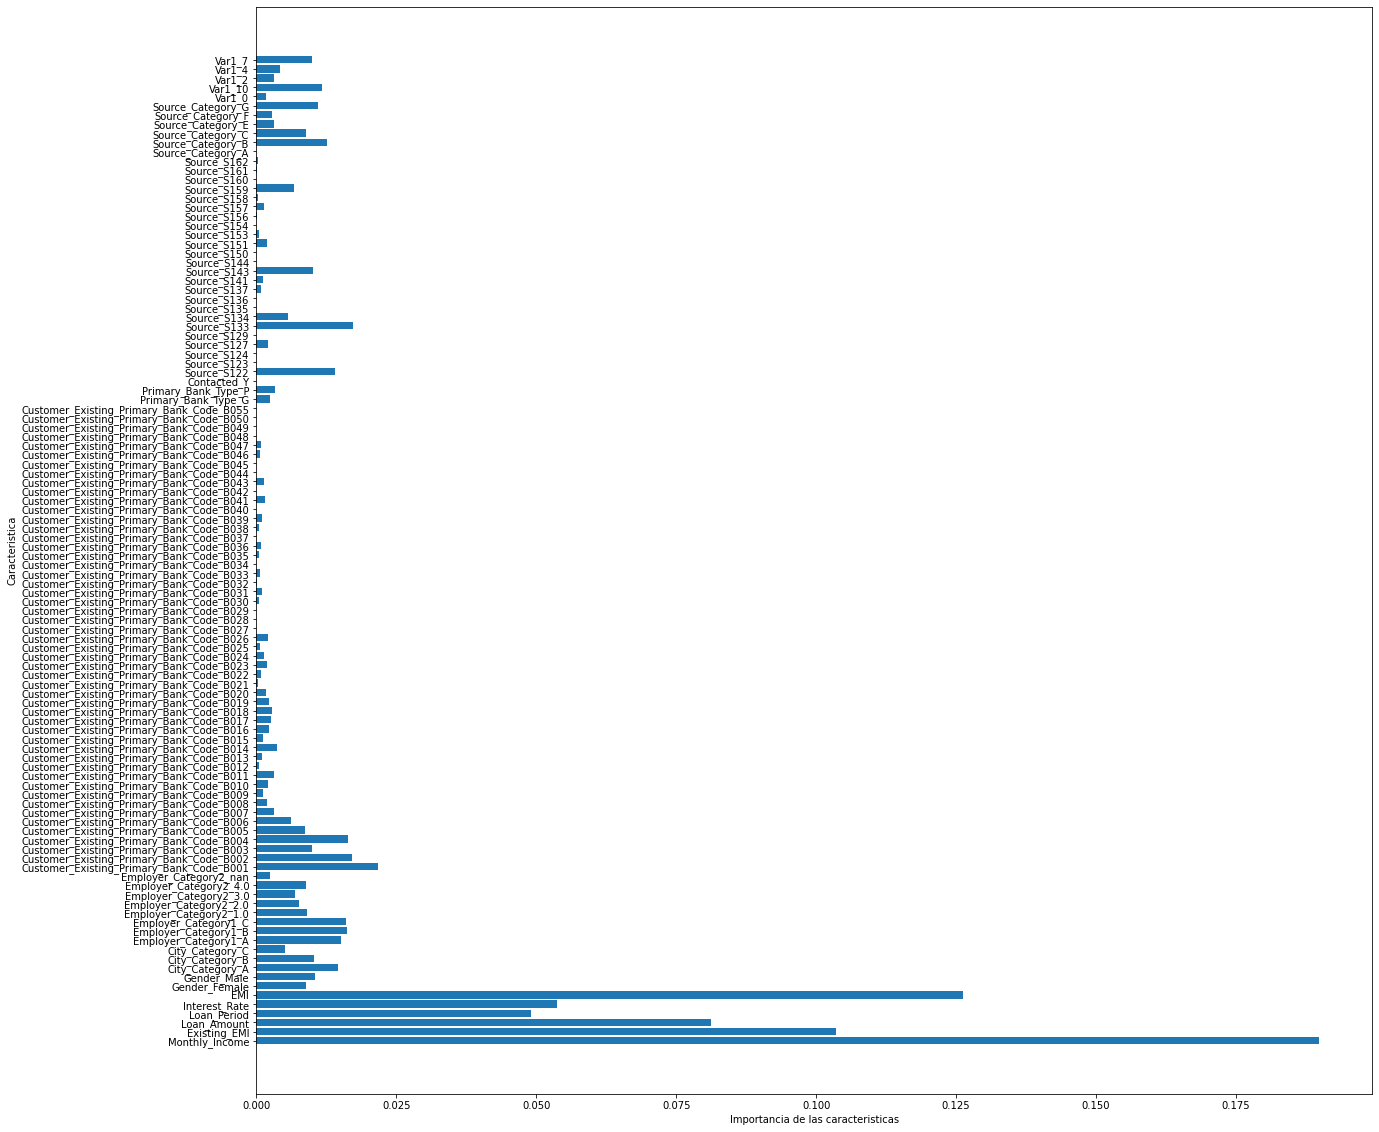

In [32]:
plt.barh(range(108),feature_importances)
plt.yticks(range(108),X.columns)
plt.xlabel('Importancia de las caracteristicas')
plt.ylabel('Caracteristica')
plt.rcParams["figure.figsize"] = (60,60)
plt.show

In [36]:
feature_cols2 =  ['City_Category_A',
 'City_Category_B',
 'Contacted_Y',
 'Customer_Existing_Primary_Bank_Code_B001',
 'Customer_Existing_Primary_Bank_Code_B002',
 'Customer_Existing_Primary_Bank_Code_B003',
 'Customer_Existing_Primary_Bank_Code_B004',
 'Customer_Existing_Primary_Bank_Code_B005',
 'Customer_Existing_Primary_Bank_Code_B006',
 'EMI',
 'Employer_Category1_A',
 'Employer_Category1_B',
 'Employer_Category1_C',
 'Employer_Category2_1.0',
 'Employer_Category2_4.0',
 'Existing_EMI',
 'Gender_Female',
 'Gender_Male',
 'Interest_Rate',
 'Loan_Amount',
 'Loan_Period',
 'Monthly_Income',
 'Source_Category_B',
 'Source_Category_G',
 'Source_S122',
 'Source_S133',
 'Source_S143',
 'Source_S150',
 'Source_S151',
 'Source_S159',
 'Var1_10',
 'Var1_7']
X = X[feature_cols2] # Caracteristicas
y = data_set['Approved'] # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=0)
arbol2 = DecisionTreeClassifier()
arbol2 = arbol2.fit(X_train,y_train)
y_pred = arbol2.predict(X_test)
arbol2.score(X_test,y_test)

0.9462809917355371

0    33071
1      809
Name: Approved, dtype: int64


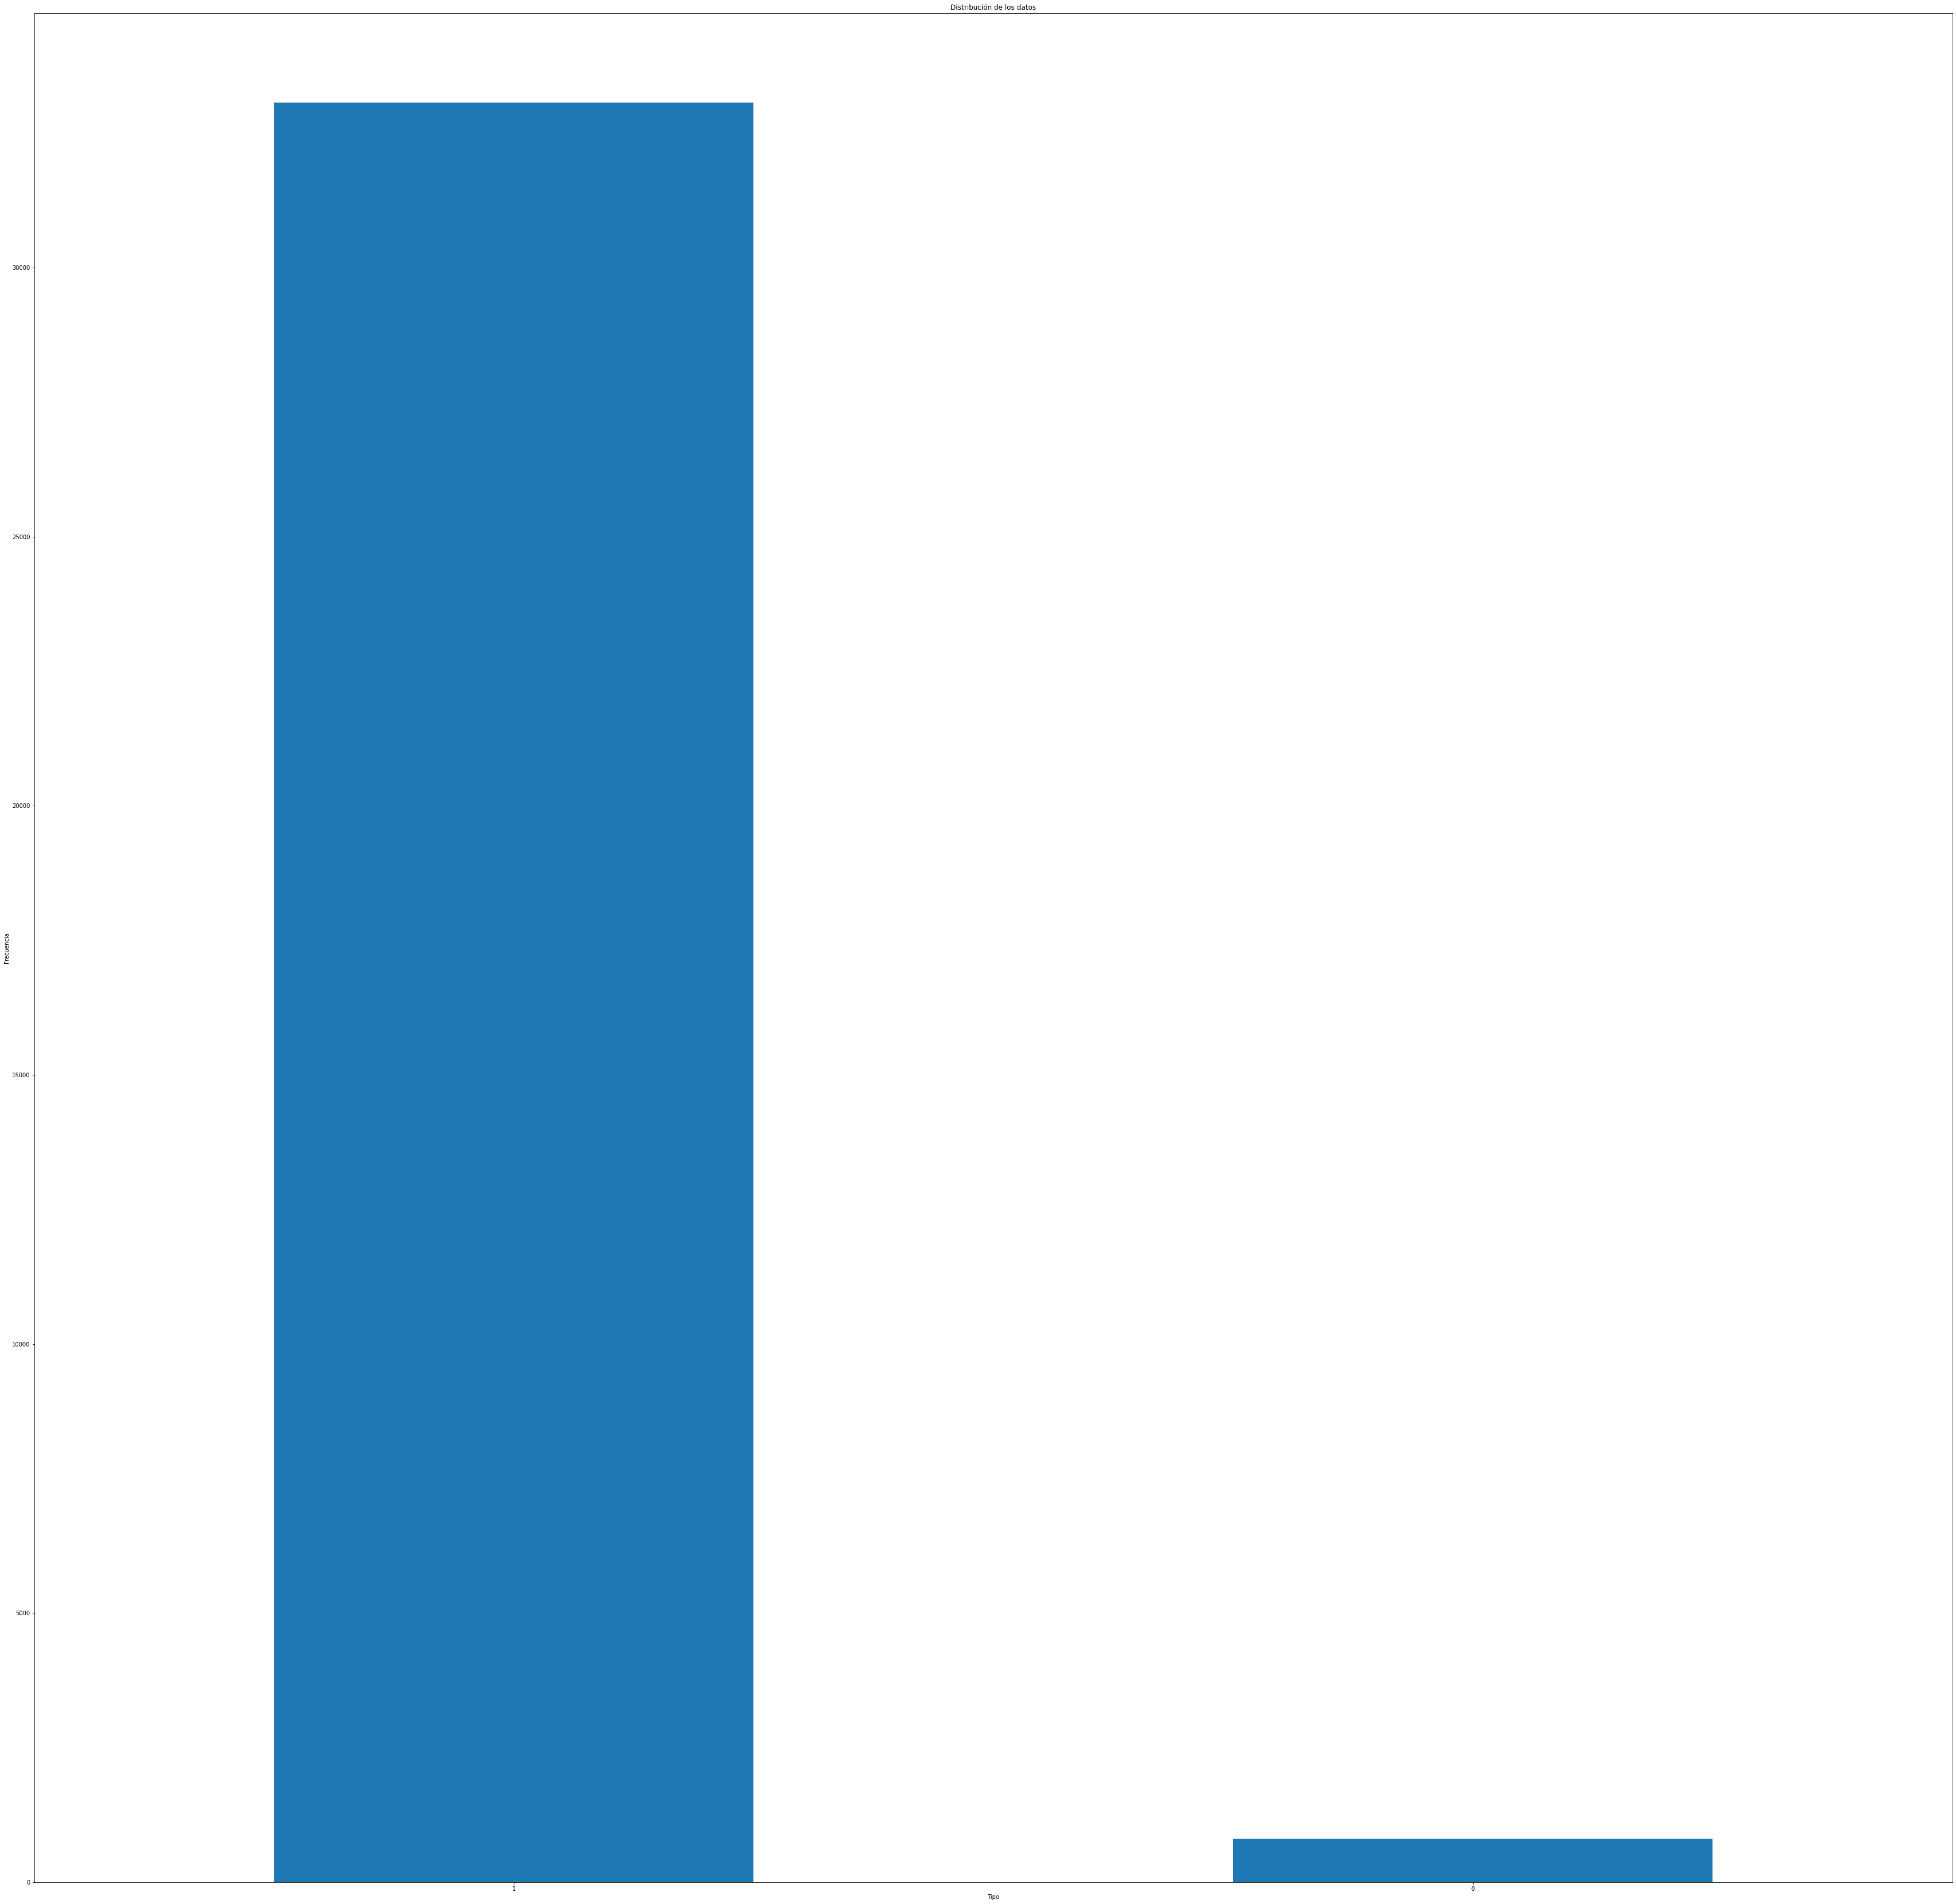

In [38]:
nr_clases = data_set['Approved'].value_counts(sort=True)
print(nr_clases)
nr_clases.plot(kind = 'bar', rot=0)
plt.xticks(range(2), ['1', '0'])
plt.title("Distribución de los datos")
plt.xlabel("Tipo")
plt.ylabel("Frecuencia")
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

In [39]:
X = X[feature_cols2] # Caracteristicas
y = data_set['Approved']  # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0) # 70% training and 30% test
arbol3 = DecisionTreeClassifier(class_weight="balanced")#,max_depth=8)
arbol3 = arbol3.fit(X_train,y_train)
y_pred = arbol3.predict(X_test)
arbol3.score(X_test,y_test)

0.950314836678473

In [40]:
arbol3.get_depth()

38

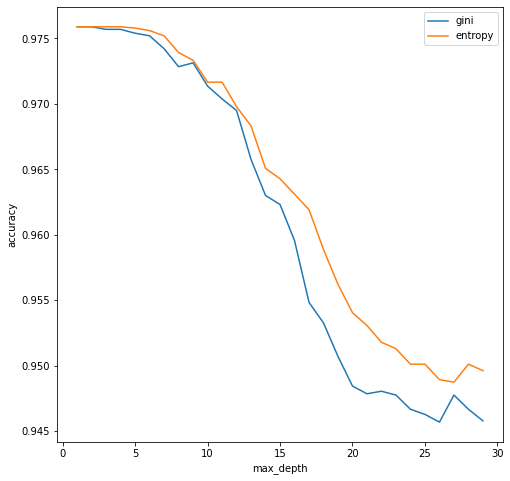

In [41]:
from sklearn.metrics import accuracy_score
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_gini.append(accuracy_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_entropy.append(accuracy_score(y_test, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

In [43]:
X = X[feature_cols2] # Caracteristicas
y = data_set['Approved']  # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0) # 70% training and 30% test
arbol3 = DecisionTreeClassifier(class_weight="balanced",max_depth=5)
arbol3 = arbol3.fit(X_train,y_train)
y_pred = arbol3.predict(X_test)
arbol3.score(X_test,y_test)


0.6233766233766234

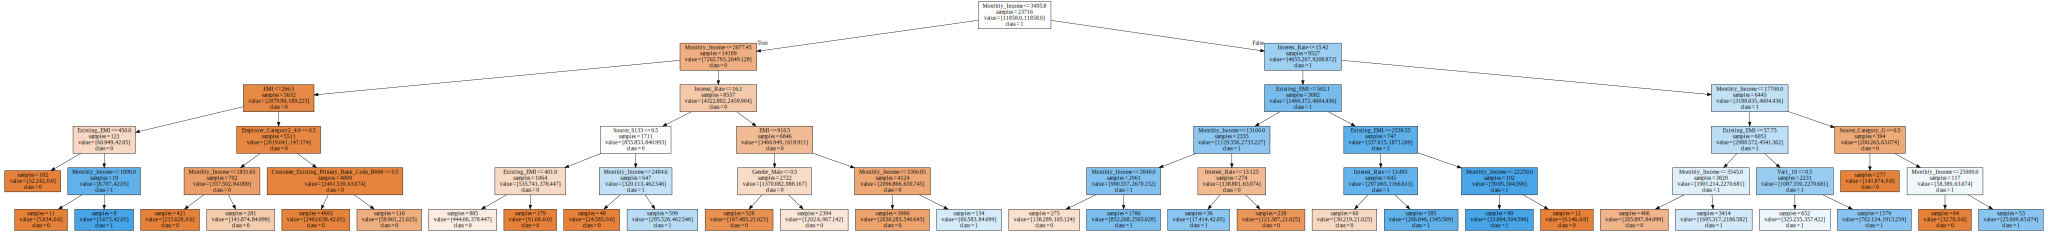

In [44]:
export_graphviz(arbol3,out_file= 'arbol3.dot', class_names=['0','1'],
                feature_names=X.columns,impurity=False,filled=True)
with open ('arbol3.dot') as f:
	dot_graph=f.read()
graphviz.Source (dot_graph)

In [52]:
df_test.isnull().sum()
#df_test.shape

ID                                         0
Gender                                     0
DOB                                        3
Lead_Creation_Date                         0
City_Code                                314
City_Category                            314
Employer_Code                           1605
Employer_Category1                      1605
Employer_Category2                         0
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code     4037
Primary_Bank_Type                       4037
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                              32
Loan_Amount                            11871
Loan_Period                            11871
Interest_Rate                          20385
EMI                                    20385
Var1                                       0
dtype: int64

In [53]:
import statistics as stats
int_mean = stats.mean(df_test['Interest_Rate'][df_test['Interest_Rate']<=20])
print(int_mean) 

lst_nan=[]
for i in range(len(df_test['Interest_Rate'])):
  if np.isnan(df_test['Interest_Rate'][i])==True:
    if df_test['Loan_Amount'][i]<=150000:
      df_test['Interest_Rate'][i]=int_mean


for i in range(len(df_test['EMI'])):
  if np.isnan(df_test['EMI'][i])==True:
    if np.isnan(df_test['Loan_Amount'][i])==False:
      x=df_test['Loan_Amount'][i]
      if len(df_test['EMI'][(df_test['Loan_Amount']==x) & (np.isnan(df_test['EMI'])==False)])>=1:
        y=stats.mean(df_test['EMI'][(df_test['Loan_Amount']==x) & (np.isnan(df_test['EMI'])==False)])
        df_test['EMI'][i]=y

dft_d=df_test[['Gender', 'City_Category','Employer_Category1',
       'Employer_Category2', 'Monthly_Income',
       'Customer_Existing_Primary_Bank_Code', 'Primary_Bank_Type', 'Contacted',
       'Source', 'Source_Category', 'Existing_EMI', 'Loan_Amount',
       'Loan_Period', 'Interest_Rate', 'EMI', 'Var1']]

#Eliminando duplicados
dft_d.drop_duplicates(keep='first',inplace=True)
#Eliminando nulos
dft_d.dropna(axis=0, inplace=True)
dft_d.reset_index(drop=True, inplace=True)
#Limitando datos
dft_d=dft_d[(dft_d['Loan_Amount']<=150000) & (dft_d['Interest_Rate']<=20)]


#'Oficina',
data_set=dft_d
data_set.reset_index(drop=True)
X_test = pd.get_dummies(data_set[feature_cols])#.fillna(0) # Caracteristicas

16.732361075544173


Se han truncado las últimas 5000 líneas del flujo de salida.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:/

In [54]:
X_test = X_test[feature_cols2] # Caracteristicas
y_pred = arbol3.predict(X_test)

In [60]:
dft_d['Approved']=y_pred

###Segmentación

In [84]:
dft_c=dft_d[dft_d['Approved']=='1']

In [86]:
## Extraigo las cuantitativas
cuanti=dft_c.select_dtypes(exclude=["object"])
## Extraigo cualitativas
cuali=dft_c.select_dtypes(include=["object"])
## Estandarizar las cuanti
escala=StandardScaler(with_mean=True, with_std=True)
escala.fit(cuanti)
datosestan=escala.transform(cuanti)


In [87]:
## Realizo el ACP
pca=PCA(0.9)
pca.fit(datosestan)  ## Ajusto el PCA (valores, vectpores, varianza)
nuevosACP=pca.transform(datosestan)
pca.explained_variance_ratio_  ## Como el ACP es tan malo, se podria trabajar con los estandarizados

array([0.43909983, 0.18979706, 0.14581532, 0.11446461, 0.08322936])

In [88]:
for i in cuali.columns:
  print(i,len(set(cuali[i])))

Gender 2
City_Category 3
Employer_Category1 3
Employer_Category2 5
Customer_Existing_Primary_Bank_Code 50
Primary_Bank_Type 2
Contacted 1
Source 20
Source_Category 5
Var1 5
Approved 1


In [89]:
acm=prince.MCA(n_components=80)
acm.fit(cuali)
nuevosACM=acm.fit_transform(cuali)
x=list(range(len(acm.explained_inertia_)))
y=np.cumsum(acm.explained_inertia_)
fig=px.line(x=x, y=y)
fig.show()

In [90]:
### Unir ACM y Cuntitativas estandarizadas
nuevos1=pd.DataFrame(datosestan, index=dft_c.index)
nuevos2=pd.DataFrame(nuevosACM, index=dft_c.index)
acm_acp=pd.concat([nuevos1, nuevos2], axis=1)
acm_acp

0         1         2   ...        77        78        79
4     -0.283470 -0.499261 -0.719587  ... -0.072550 -0.085413 -0.018361
8     -0.424491 -0.499261 -0.323050  ... -0.227735  0.012355  0.946465
15    -0.079774  0.954218  1.206451  ...  0.207929 -0.040861  0.505545
17    -0.132004 -0.499261  1.263099  ... -0.233344  0.134238  0.195284
19    -0.419268 -0.499261 -0.294726  ... -0.051487  0.060198  0.040403
...         ...       ...       ...  ...       ...       ...       ...
16516 -0.223406  0.059770 -1.002828  ...  0.083946 -0.514886  0.044306
16517 -0.105889  0.842412  0.413377  ...  0.042963  0.295406 -0.157461
16521 -0.158119  0.624391 -1.002828  ... -0.035066  0.192516 -0.034347
16523  0.220549  1.792764 -0.153105  ... -0.108903 -0.024480 -0.016451
16524 -0.184234 -0.499261  0.130136  ...  0.082039  0.099091  0.066512

[5586 rows x 87 columns]

In [91]:
within= [] ## Elbow Graph (codo), se tiende a elegir muchos grupos
for k in range(1,10):
    kmeanModel = KMeans(n_clusters=k).fit(acm_acp)
    within.append(kmeanModel.inertia_)
fig=px.line(x=list(range(1,10)), y=within,  title="Within Variance")
fig.show()

In [92]:
kmedias=KMeans(n_clusters=2).fit(acm_acp) ### Salieron los grupos, ahora visualizar
kmedias.labels_
dft_c["Grupo"]=kmedias.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [93]:
for i in list(set(dft_c["Grupo"])):
  print(i,len(dft_c[dft_c["Grupo"]==i]))


0 3639
1 1947


In [80]:
cuali.columns

Index(['Gender', 'City_Category', 'Employer_Category1', 'Employer_Category2',
       'Customer_Existing_Primary_Bank_Code', 'Primary_Bank_Type', 'Contacted',
       'Source', 'Source_Category', 'Var1', 'Approved'],
      dtype='object')

In [94]:
from scipy import stats  ### Kruskal wallis
DF=dft_c[['Monthly_Income', 'Existing_EMI', 'Loan_Amount', 'Loan_Period',
       'Interest_Rate', 'EMI','Grupo']]
a=DF.columns
pvalor=[]
for i in range(len(a)):
  b,c=stats.kruskal(DF[DF["Grupo"]==0][a[i]], DF[DF["Grupo"]==1][a[i]])
  #b,c=stats.kruskal(DF[DF["Grupo"]==0][a[i]], DF[DF["Grupo"]==1][a[i]],DF[DF["Grupo"]==3][a[i]],DF[DF["Grupo"]==4][a[i]])
  pvalor.append(c)
pvalor=pd.DataFrame(pvalor, index=a, columns=["Pvalue"])
pvalor.sort_values(["Pvalue"], ascending=True).drop("Grupo", axis=0)

Pvalue
Loan_Amount      0.000000e+00
EMI              0.000000e+00
Loan_Period     1.857890e-102
Existing_EMI     1.518795e-84
Monthly_Income   2.944759e-84
Interest_Rate    3.144398e-06

In [96]:
### Chi cuadrados con las cuali
DF=dft_c[['Gender', 'City_Category', 'Employer_Category1', 'Employer_Category2',
       'Customer_Existing_Primary_Bank_Code', 'Primary_Bank_Type', 'Contacted',
       'Source', 'Source_Category', 'Var1', 'Approved','Grupo']]
a=DF.columns
pvalor=[]
for i in range(len(a)):
  tabla=pd.crosstab(DF[a[i]], DF["Grupo"])
  b,c,d,e=chi2_contingency(tabla)
  pvalor.append(c)
pvalor=pd.DataFrame(pvalor, index=a, columns=["Pvalue"])
pvalor.sort_values(["Pvalue"], ascending=True).drop("Grupo", axis=0)

Pvalue
Source_Category                      6.931083e-132
Var1                                  2.833068e-36
City_Category                         5.024506e-09
Source                                1.286201e-06
Employer_Category2                    4.042092e-04
Gender                                4.547589e-03
Customer_Existing_Primary_Bank_Code   3.633522e-02
Employer_Category1                    5.618278e-01
Primary_Bank_Type                     8.895180e-01
Contacted                             1.000000e+00
Approved                              1.000000e+00

In [97]:
tabla=dft_c.groupby(["Source_Category", "Grupo"]).size()
tabla=tabla.reset_index(name="Conteo")
tabla
fig=px.bar(tabla, x=tabla.Source_Category, y=tabla.Conteo, facet_col=tabla.Grupo,)
fig.show()

In [98]:
tabla=dft_c.groupby(["Var1", "Grupo"]).size()
tabla=tabla.reset_index(name="Conteo")
tabla
fig=px.bar(tabla, x=tabla.Var1, y=tabla.Conteo, facet_col=tabla.Grupo,)
fig.show()

In [99]:
tabla=dft_c.groupby(["City_Category", "Grupo"]).size()
tabla=tabla.reset_index(name="Conteo")
tabla
fig=px.bar(tabla, x=tabla.City_Category, y=tabla.Conteo, facet_col=tabla.Grupo,)
fig.show()

In [100]:
tabla=dft_c.groupby(["Source", "Grupo"]).size()
tabla=tabla.reset_index(name="Conteo")
tabla
fig=px.bar(tabla, x=tabla.Source, y=tabla.Conteo, facet_col=tabla.Grupo,)
fig.show()

In [102]:
tabla=dft_c.groupby(["Employer_Category2", "Grupo"]).size()
tabla=tabla.reset_index(name="Conteo")
tabla
fig=px.bar(tabla, x=tabla.Employer_Category2, y=tabla.Conteo, facet_col=tabla.Grupo,)
fig.show()

In [103]:
	
tabla=dft_c.groupby(["Customer_Existing_Primary_Bank_Code", "Grupo"]).size()
tabla=tabla.reset_index(name="Conteo")
tabla
fig=px.bar(tabla, x=tabla.Customer_Existing_Primary_Bank_Code, y=tabla.Conteo, facet_col=tabla.Grupo,)
fig.show()

In [ ]:
df_v.dtypes

Con Vendedor                  int64
Tipo canal                   object
Activo                        int64
Fecha Vinculación    datetime64[ns]
Fecha retiro         datetime64[ns]
SUCURSAL FINAL               object
Oficina                       int64
dtype: object

## Arbol de desición

0.7198275862068966

20

In [ ]:
from sklearn.metrics import accuracy_score

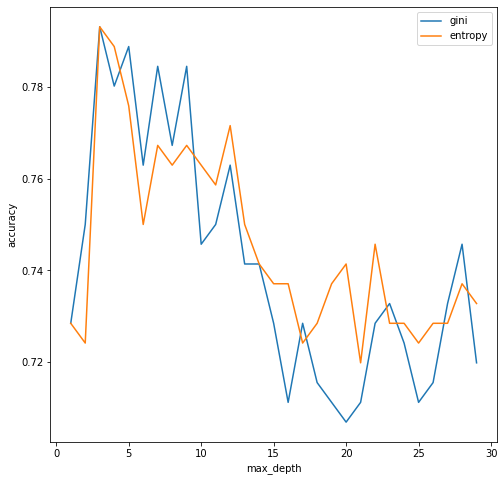

0.7844827586206896

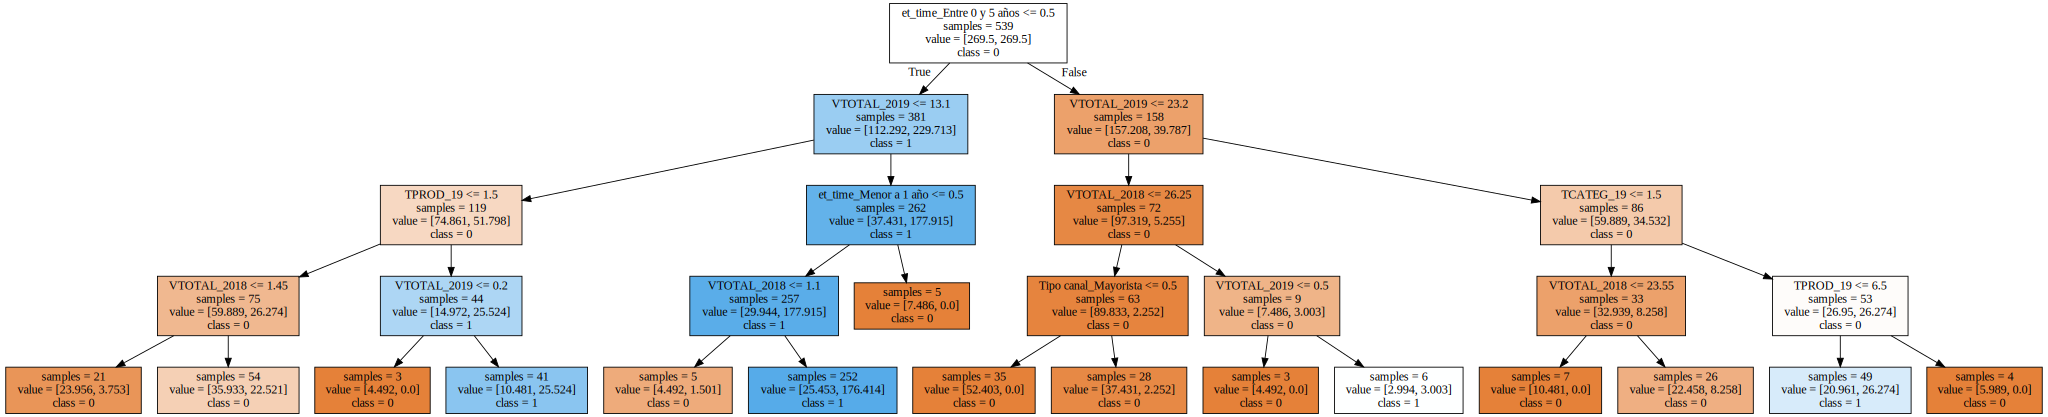

##**RANDOM FOREST**



In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier ### El importante
from sklearn.ensemble import RandomForestRegressor### El importante
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

In [ ]:
#'Oficina',
feature_cols = ['Tipo canal','et_time',
       'TOFI_19', 'TOFI_18', 'VTOTAL_2019', 'VTOTAL_2018', 'TCATEG_19',
       'TCATEG_18', 'MCATEG_19', 'MCATEG_18', 'TPROD_19', 'TPROD_18',
       'MPROD_19', 'MPROD_18','CIUDAD', 'CLASIFICACIÓN']
X = pd.get_dummies(data_set[feature_cols])#.fillna(0) # Caracteristicas
Y = data_set['Activo']# Variable objetivo

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, stratify=Y) 

In [ ]:
RF= RandomForestClassifier(min_samples_leaf=1, n_estimators=100)### Deje 5 datos por nodo terminal
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=RF.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       211
           1       1.00      1.00      1.00       405

    accuracy                           1.00       616
   macro avg       1.00      1.00      1.00       616
weighted avg       1.00      1.00      1.00       616



In [ ]:
y_pred=RF.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.62      0.70        53
           1       0.82      0.92      0.87       102

    accuracy                           0.82       155
   macro avg       0.81      0.77      0.79       155
weighted avg       0.82      0.82      0.81       155



/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:569: UserWarning:

class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:569: UserWarning:

class_weight presets "balanced" or "balanced_subsample" are not reco

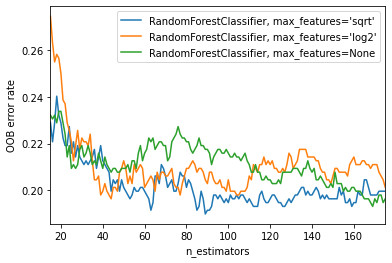

In [ ]:
from collections import OrderedDict
RANDOM_STATE=20
ensemble_RF= [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt",class_weight="balanced",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',class_weight="balanced",
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,class_weight="balanced",
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_RF)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 175

for label, clf in ensemble_RF:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [ ]:
RF= RandomForestClassifier(min_samples_leaf=5,max_features="sqrt",class_weight="balanced", n_estimators=90) ### Lo mas pequeño del gráfico anterior
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=RF.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       211
           1       0.92      0.88      0.90       405

    accuracy                           0.87       616
   macro avg       0.85      0.86      0.86       616
weighted avg       0.87      0.87      0.87       616



In [ ]:
y_pred=RF.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79        53
           1       0.88      0.90      0.89       102

    accuracy                           0.86       155
   macro avg       0.84      0.84      0.84       155
weighted avg       0.86      0.86      0.86       155



Ranking de Variables:
1. feature 2 (0.169275)
2. feature 15 (0.146340)
3. feature 11 (0.135325)
4. feature 3 (0.131450)
5. feature 4 (0.058506)
6. feature 6 (0.051524)
7. feature 5 (0.030021)
8. feature 7 (0.028311)
9. feature 118 (0.019862)
10. feature 8 (0.015863)
11. feature 9 (0.015528)
12. feature 0 (0.015142)
13. feature 103 (0.014509)
14. feature 22 (0.013883)
15. feature 21 (0.012719)
16. feature 119 (0.012469)
17. feature 26 (0.009966)
18. feature 1 (0.009893)
19. feature 27 (0.009565)
20. feature 12 (0.009144)
21. feature 17 (0.008281)
22. feature 25 (0.007143)
23. feature 20 (0.006831)
24. feature 16 (0.006621)
25. feature 60 (0.006240)
26. feature 69 (0.005917)
27. feature 36 (0.004926)
28. feature 94 (0.004794)
29. feature 96 (0.003981)
30. feature 120 (0.003120)
31. feature 95 (0.002861)
32. feature 10 (0.002119)
33. feature 93 (0.001945)
34. feature 116 (0.001620)
35. feature 102 (0.001598)
36. feature 108 (0.001514)
37. feature 46 (0.001508)
38. feature 106 (0.001450)
3

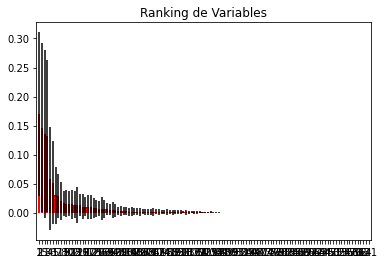

In [ ]:
#Improtancia de las varaibles

importancias = RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF.estimators_],
             axis=0)
indices = np.argsort(importancias)[::-1]

# Print the feature ranking
print("Ranking de Variables:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importancias[indices[f]]))

plt.figure()
plt.title("Ranking de Variables")
plt.bar(range(X.shape[1]), importancias[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
Impor=pd.DataFrame(importancias, index=X_train.columns)
dfx=Impor.sort_values(by=0,  ascending=False).reset_index()

In [ ]:
dfx.head(15)

index         0
0                 VTOTAL_2019  0.169275
1   et_time_Entre 6 y 10 años  0.146340
2    et_time_Entre 0 y 5 años  0.135325
3                 VTOTAL_2018  0.131450
4                   TCATEG_19  0.058506
5                    TPROD_19  0.051524
6                   TCATEG_18  0.030021
7                    TPROD_18  0.028311
8             CLASIFICACIÓN_1  0.019862
9        Tipo canal_Mayorista  0.015863
10       Tipo canal_Minorista  0.015528
11                    TOFI_19  0.015142
12            CIUDAD_MEDELLIN  0.014509
13             MCATEG_18_A123  0.013883
14             MCATEG_19_A128  0.012719

In [ ]:
X = X[feature_cols2] # Caracteristicas
y = data_set['Activo']  # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0) # 70% training and 30% test
arbol3 = DecisionTreeClassifier(class_weight="balanced",max_depth=4)
arbol3 = arbol3.fit(X_train,y_train)
y_pred = arbol3.predict(X_test)
arbol3.score(X_test,y_test)
